## Part 1: SQL Challenge (20 minutes)
### Using the dataset, complete the following tasks:
### 1. Total Revenue Calculation: Write an SQL query to calculate the total revenue generated by trips that ended within the last 30 days of the data.

In [102]:
import duckdb

# Path to Parquet file
parquet_file = './yellow_tripdata_2024-08.parquet'

# Update the SQL query to read the file directly
query_1 = f"""
SELECT SUM(total_amount) AS total_revenue
FROM read_parquet('{parquet_file}')
WHERE tpep_dropoff_datetime >= DATE_ADD((SELECT MAX(tpep_dropoff_datetime) FROM read_parquet('{parquet_file}')), INTERVAL '-30 DAY')
;
"""

# Execute the query
result = duckdb.query(query_1).to_df()

print(result)

   total_revenue
0   5.319794e+07


### 2.Top 3 Pickup Locations: Find the top 3 pickup locations by total revenue over the last 30 days in the dataset.

In [103]:
import duckdb

# Path to Parquet file
parquet_file = './yellow_tripdata_2024-08.parquet'

# SQL query to find the top 3 pickup locations by total revenue in the last 30 days
query_2 = f"""
SELECT 
    PULocationID, 
    SUM(total_amount) AS total_revenue
FROM 
    read_parquet('{parquet_file}')
WHERE 
    tpep_dropoff_datetime >= DATE_ADD((SELECT MAX(tpep_dropoff_datetime) FROM read_parquet('{parquet_file}')), INTERVAL '-30 DAY')
GROUP BY 
    PULocationID
ORDER BY 
    total_revenue DESC
LIMIT 3;
"""

# Execute the query
result = duckdb.query(query_2).to_df()

# Display the result
print(result)


   PULocationID  total_revenue
0           132   8.973828e+06
1           138   4.379155e+06
2           161   2.069320e+06


### 3. Frequent Riders: Identify passengers (if available) who completed more than 5 trips within the last 30 days of the data.

The data doesn't provide information on the passengers' identities.

## Part 3: Data Processing with Python (Optional)
### Write a Python script to:
### 1. Download the specified month's dataset if it is not already available locally.
### 2. Connect to a TimescaleDB or PostgreSQL database and load the data.
### 3. Calculate the average fare per day of the week for the specified month.
### 4. Generate a summary report listing each day of the week and the corresponding average fare, saving it to a CSV file named average_fare_per_day.csv.


In [126]:
import pandas as pd

# Path to Parquet file
parquet_file = './yellow_tripdata_2024-08.parquet'

# Load the parquet file into a pandas DataFrame
result = pd.read_parquet(parquet_file)


from sqlalchemy import create_engine

# Database credentials and configuration
user = 'postgres'
password = '134094'
host = 'localhost'
port = '5433'
database = 'NYC_Yellow_Taxi_Trip'

# Create the connection string
connection_string = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"

# Connect to the database
engine = create_engine(connection_string)

# Load DataFrame into PostgreSQL table


In [127]:
result.to_sql('Yello_Taxi_Trip', engine, if_exists='replace', index=False)

183

## Part 4: Data Visualization (20 minutes)
### Using the dataset, display some meaningful information by creating a chart. Choose one of the following visualization options:
### 1. Revenue Over Time: Display a time series chart showing the total revenue per day.

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import duckdb

# Path to Parquet file
parquet_file = './yellow_tripdata_2024-08.parquet'

# SQL query to load thethe time and total revenue per day in the last 30 days
query_3 = f"""
SELECT 
    date_trunc('day', tpep_pickup_datetime) AS date, 
    SUM(total_amount) AS total_revenue
FROM 
    read_parquet('{parquet_file}')
WHERE 
    tpep_dropoff_datetime >= DATE_ADD((SELECT MAX(tpep_dropoff_datetime) FROM read_parquet('{parquet_file}')), INTERVAL '-30 DAY')
GROUP BY 
    date_trunc('day', tpep_pickup_datetime)
ORDER BY
    date_trunc('day', tpep_pickup_datetime)
;
"""

# Execute the query
result = duckdb.query(query_3).to_df()

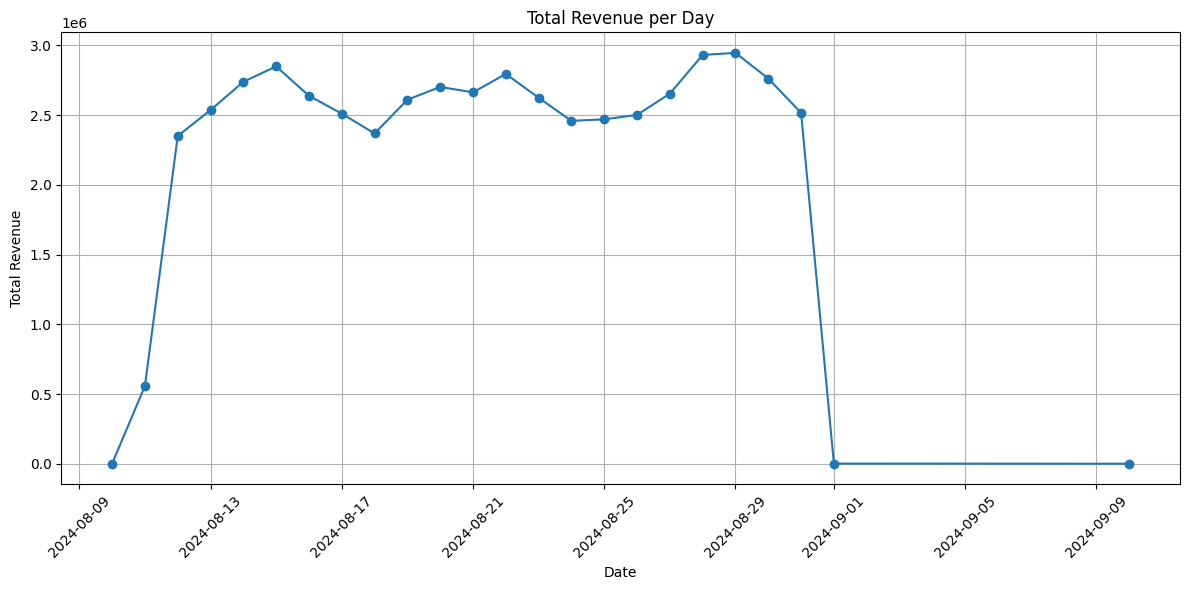

In [125]:
# result['date'] = result['tpep_dropoff_datetime'].dt.date

# Step 4: Plot the time series chart
plt.figure(figsize=(12, 6))
plt.plot(result['date'], result['total_revenue'], marker='o')
plt.title('Total Revenue per Day')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Display the result